In [417]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

url = 'https://www.booking.com/searchresults.en-gb.html?ss=Jaipur&ssne=Jaipur&ssne_untouched=Jaipur&label=gen173rf-1BCAEoggI46AdIM1gDaGyIAQGYAQm4ARfIAQzYAQHoAQGIAgGiAhBzZWFyY2guYnJhdmUuY29tqAIDuALVkoWsBsACAdICJGY0NmE1ZmM3LTI3YjItNDk3OC1iYmZiLTE5ODg4YWQxNmMyMNgCBeACAQ&sid=33b1b731f58c2427be63426c9efad21c&aid=304142&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-2098033&dest_type=city&checkin=2023-12-25&checkout=2023-12-26&ltfd=1%3A5%3A12-2023%3A1%3A&group_adults=2&no_rooms=1&group_children=0'
response = requests.get(url,headers = headers)
soup = BeautifulSoup(response.content, 'html.parser')
response
print(soup)

<!DOCTYPE html>

<!--
You know you could be getting paid to poke around in our code?
We're hiring designers and developers to work in Amsterdam:
https://careers.booking.com/
-->
<!-- wdot-802 -->
<script nonce="otpa96y4gYiB1AT" type="text/javascript">
document.addEventListener('DOMContentLoaded', function () {
/**
* provides the current user's cookie consent
* in order to use it:
* 1. inline privacy/cookieConsent.js in the page you need to use it.
* please note that this library relies on window.PCM.isCountryNeedCookieBanner to be initialised
* before using (calling getValue function) it
* 2. in your js file:
*
* var privacyCookieConsent = B.require('privacyCookieConsent');
* var consent = privacyCookieConsent.getValue();
*/
B.define('privacyCookieConsent', function () {
var consentGroupIsAllowed = {
analytical: 'C0002%3A1',
marketing: 'C0004%3A1'
};
var optanonConsentCookieName = 'OptanonConsent';
var optanonBoxClosedCookieName = 'OptanonAlertBoxClosed';
var halfOfYearMillis = 180 * 2

In [418]:
hotel_data = soup.findAll('div', attrs = {'class':'c82435a4b8 a178069f51 a6ae3c2b40 a18aeea94d d794b7a0f7 f53e278e95 c6710787a4'})
# class="c82435a4b8 a178069f51 a6ae3c2b40 a18aeea94d d794b7a0f7 f53e278e95 c6710787a4"

In [419]:
hotel_data

[<div aria-label="Property" class="c82435a4b8 a178069f51 a6ae3c2b40 a18aeea94d d794b7a0f7 f53e278e95 c6710787a4" data-testid="property-card" role="group" style="--bui_box_padding--s:4"><div class="c066246e13" data-testid="property-card-container"><div class="a5922b8ca1"><div class="e952b01718"><a aria-hidden="true" data-testid="property-card-desktop-single-image" href="https://www.booking.com/hotel/in/collection-o-80519-rani-bagh.en-gb.html?label=gen173rf-1BCAEoggI46AdIM1gDaGyIAQGYAQm4ARfIAQzYAQHoAQGIAgGiAhBzZWFyY2guYnJhdmUuY29tqAIDuALVkoWsBsACAdICJGY0NmE1ZmM3LTI3YjItNDk3OC1iYmZiLTE5ODg4YWQxNmMyMNgCBeACAQ&amp;sid=33b1b731f58c2427be63426c9efad21c&amp;aid=304142&amp;ucfs=1&amp;arphpl=1&amp;checkin=2023-12-25&amp;checkout=2023-12-30&amp;dest_id=-2098033&amp;dest_type=city&amp;group_adults=2&amp;req_adults=2&amp;no_rooms=1&amp;group_children=0&amp;req_children=0&amp;hpos=1&amp;hapos=1&amp;sr_order=popularity&amp;srpvid=5c686278d3c2033c&amp;srepoch=1702994418&amp;all_sr_blocks=937033203_381

In [420]:
hotel_name = []
price = []
ratings = []
location = []
room_type = []
distance = []

In [421]:
for store in hotel_data:
    name = store.find('div', class_ = 'f6431b446c a15b38c233').text
    rate = store.find('div', class_ = 'a3b8729ab1 d86cee9b25').text if store.find('div', class_ = 'a3b8729ab1 d86cee9b25') else '0'
    Price = store.div.find('span', class_ = 'f6431b446c fbfd7c1165 e84eb96b1f').text.replace('₹\xa0','')
    loc = store.find('span', class_ = 'aee5343fdb def9bc142a').text.replace(',','')
    rt = store.find('h4', class_ = 'abf093bdfe e8f7c070a7').text
    dist = store.find('span', attrs = {'data-testid':'distance'}).text
    
    hotel_name.append(name)
    ratings.append(rate)
    location.append(loc)
    room_type.append(rt)
    price.append(Price)
    distance.append(dist)

In [422]:
hotel_name

['FabExpress Rani Bagh',
 'Holiday Inn Express & Suites Jaipur Gopalpura',
 'Hotel Sahibs Corporate Inn - Family & Corporate Hotel Chain',
 'Shree Nikunj - A Boutique Homestay',
 'Jaipur Marriott Hotel',
 'Hotel Pulse Inn Jaipur',
 'Jaipur Inn',
 'Talabgaon Bagh',
 'Noble House - A Heritage Home',
 'InterContinental Jaipur Tonk Road, an IHG Hotel',
 'Naila Kothi, Jaipur',
 'hotel the royal palace',
 'Doubletree By Hilton Jaipur Amer',
 'Hotel Khandaka mahal',
 'Shakun Hotels And Resorts',
 'Taj Amer, Jaipur',
 'Fairfield by Marriott Jaipur',
 'Click Hotel Jaipur',
 'Holiday Inn Jaipur City Centre, an IHG Hotel',
 'Gems Suites',
 'Boby Home Stay " Boby Mansion "',
 'Radisson Jaipur City Center',
 'Olive Service Apartments - Vaishali Nagar',
 'Hyatt Place Jaipur Malviya Nagar',
 'Sarovar Premiere Jaipur']

In [423]:
ratings

['8.1',
 '8.0',
 '6.8',
 '10',
 '8.1',
 '7.9',
 '8.3',
 '0',
 '8.5',
 '8.4',
 '10',
 '0',
 '8.4',
 '8.1',
 '7.4',
 '9.0',
 '8.0',
 '7.7',
 '8.1',
 '9.0',
 '8.5',
 '7.8',
 '9.3',
 '8.2',
 '7.4']

In [424]:
price

['10,082',
 '35,706',
 '31,990',
 '36,000',
 '77,000',
 '17,500',
 '21,000',
 '37,500',
 '20,995',
 '42,996',
 '61,236',
 '4,550',
 '47,000',
 '19,995',
 '63,491',
 '119,500',
 '50,000',
 '81,960',
 '74,246',
 '16,820',
 '8,250',
 '62,100',
 '40,240',
 '78,000',
 '47,876']

In [425]:
location

['Jaipur',
 'Jaipur',
 'Raja Park Jaipur',
 'Vaishali Nagar Jaipur',
 'Tonk Road Jaipur',
 'Jaipur',
 'Jaipur',
 'Jaipur',
 'Jaipur',
 'Tonk Road Jaipur',
 'Jaipur',
 'Jaipur',
 'Amer Jaipur',
 'Jaipur',
 'C Scheme Jaipur',
 'Amer Jaipur',
 'Bani Park Jaipur',
 'Jaipur',
 'Jaipur',
 'Bani Park Jaipur',
 'Jaipur',
 'Jaipur',
 'Vaishali Nagar Jaipur',
 'Malviya Nagar Jaipur',
 'Jaipur']

In [426]:
room_type

['Deluxe Room',
 '2 Twin Standard',
 'Double Room',
 'Deluxe Double Room',
 'Executive Twin Room : Complimentary Cocktails at Lounge 18 (6 pm to 8 pm) & 2-way airport transfer',
 'Deluxe King Room',
 'Deluxe Double or Twin Room',
 'Double Room',
 'Duplex Quadruple Room',
 'Standard Twin Room',
 'King Room with Garden View',
 'Double Room',
 'King Room: Avail 20% discount on F& B, Buy 1 & Get 1 (selected brands) at Onyx Bar between 6 to 8 PM',
 'Superior Double Room',
 'Deluxe Double or Twin Room',
 'Luxury Room Twin Bed',
 'Guest Room 1 King City View',
 'Executive Room - 10% off on Laundry, 10% off on F&B, Complimentary Drivers accommodation',
 'Standard Twin Room with City View Non Smoking ',
 'Deluxe Double Room with Balcony',
 'Deluxe Double Room',
 'Standard Room: Avail 10% Discount on Food (Except Dragon House) & Soft Beverages and Laundry',
 'Premier One-Bedroom Apartment',
 'Twin Room',
 'Deluxe Twin Room: Avail 20% discount on FNB & (1+1 Happy Hour from 1pm - 11pm on selected 

In [427]:
distance

['10.7 km from centre',
 '6.3 km from centre',
 '2.8 km from centre',
 '7.5 km from centre',
 '8.5 km from centre',
 '2.9 km from centre',
 '2.3 km from centre',
 '9.3 km from centre',
 '8.4 km from centre',
 '15.3 km from centre',
 '12.9 km from centre',
 '1.6 km from centre',
 '16.9 km from centre',
 '1.4 km from centre',
 '1.6 km from centre',
 '12.8 km from centre',
 '2.4 km from centre',
 '2.9 km from centre',
 '2.9 km from centre',
 '2.4 km from centre',
 '0.6 km from centre',
 '2.2 km from centre',
 '7.9 km from centre',
 '6.7 km from centre',
 '4.4 km from centre']

In [428]:
df = pd.DataFrame({'Hotel Name':hotel_name, 'Ratings':ratings,'Location':location,'Distance':distance,'Price':price})

In [429]:
df.head(20)

,Hotel Name,Ratings,Location,Distance,Price
0,FabExpress Rani Bagh,8.1,Jaipur,10.7 km from centre,"10,082"
1,Holiday Inn Express & Suites Jaipur Gopalpura,8.0,Jaipur,6.3 km from centre,"35,706"
2,Hotel Sahibs Corporate Inn - Family & Corporat...,6.8,Raja Park Jaipur,2.8 km from centre,"31,990"
3,Shree Nikunj - A Boutique Homestay,10,Vaishali Nagar Jaipur,7.5 km from centre,"36,000"
4,Jaipur Marriott Hotel,8.1,Tonk Road Jaipur,8.5 km from centre,"77,000"
5,Hotel Pulse Inn Jaipur,7.9,Jaipur,2.9 km from centre,"17,500"
6,Jaipur Inn,8.3,Jaipur,2.3 km from centre,"21,000"
7,Talabgaon Bagh,0,Jaipur,9.3 km from centre,"37,500"
8,Noble House - A Heritage Home,8.5,Jaipur,8.4 km from centre,"20,995"
9,"InterContinental Jaipur Tonk Road, an IHG Hotel",8.4,Tonk Road Jaipur,15.3 km from centre,"42,996"


In [430]:
df.to_csv("C:/Users/HP/Hotel Dataset.csv",index = False)

In [530]:
df = pd.read_csv("C:/Users/HP/Hotel Dataset.csv")

In [531]:
df.isnull().sum()

Hotel Name    0
Ratings       0
Location      0
Distance      0
Price         0
dtype: int64

In [532]:
df['Price'] = pd.to_numeric(df['Price'].str.replace(',', ''), errors='coerce')

In [533]:
df.head()

,Hotel Name,Ratings,Location,Distance,Price
0,FabExpress Rani Bagh,8.1,Jaipur,10.7 km from centre,10082
1,Holiday Inn Express & Suites Jaipur Gopalpura,8.0,Jaipur,6.3 km from centre,35706
2,Hotel Sahibs Corporate Inn - Family & Corporat...,6.8,Raja Park Jaipur,2.8 km from centre,31990
3,Shree Nikunj - A Boutique Homestay,10.0,Vaishali Nagar Jaipur,7.5 km from centre,36000
4,Jaipur Marriott Hotel,8.1,Tonk Road Jaipur,8.5 km from centre,77000


In [534]:
df['Distance'] = pd.to_numeric(df['Distance'].str.replace('km from centre', ''), errors='coerce')

In [535]:
df

,Hotel Name,Ratings,Location,Distance,Price
0,FabExpress Rani Bagh,8.1,Jaipur,10.7,10082
1,Holiday Inn Express & Suites Jaipur Gopalpura,8.0,Jaipur,6.3,35706
2,Hotel Sahibs Corporate Inn - Family & Corporat...,6.8,Raja Park Jaipur,2.8,31990
3,Shree Nikunj - A Boutique Homestay,10.0,Vaishali Nagar Jaipur,7.5,36000
4,Jaipur Marriott Hotel,8.1,Tonk Road Jaipur,8.5,77000
5,Hotel Pulse Inn Jaipur,7.9,Jaipur,2.9,17500
6,Jaipur Inn,8.3,Jaipur,2.3,21000
7,Talabgaon Bagh,0.0,Jaipur,9.3,37500
8,Noble House - A Heritage Home,8.5,Jaipur,8.4,20995
9,"InterContinental Jaipur Tonk Road, an IHG Hotel",8.4,Tonk Road Jaipur,15.3,42996


In [536]:
df = df[['Ratings', 'Location', 'Distance', 'Price']]

In [537]:
df

,Ratings,Location,Distance,Price
0,8.1,Jaipur,10.7,10082
1,8.0,Jaipur,6.3,35706
2,6.8,Raja Park Jaipur,2.8,31990
3,10.0,Vaishali Nagar Jaipur,7.5,36000
4,8.1,Tonk Road Jaipur,8.5,77000
5,7.9,Jaipur,2.9,17500
6,8.3,Jaipur,2.3,21000
7,0.0,Jaipur,9.3,37500
8,8.5,Jaipur,8.4,20995
9,8.4,Tonk Road Jaipur,15.3,42996


In [538]:
from sklearn.preprocessing import LabelEncoder

In [539]:
lr = LabelEncoder()

In [540]:
df['Location'] = lr.fit_transform(df['Location'])

C:\Users\HP\AppData\Local\Temp\ipykernel_5200\3831628862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = lr.fit_transform(df['Location'])


In [541]:
df

,Ratings,Location,Distance,Price
0,8.1,3,10.7,10082
1,8.0,3,6.3,35706
2,6.8,5,2.8,31990
3,10.0,7,7.5,36000
4,8.1,6,8.5,77000
5,7.9,3,2.9,17500
6,8.3,3,2.3,21000
7,0.0,3,9.3,37500
8,8.5,3,8.4,20995
9,8.4,6,15.3,42996


In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ratings   25 non-null     float64
 1   Location  25 non-null     int32  
 2   Distance  25 non-null     float64
 3   Price     25 non-null     int64  
dtypes: float64(2), int32(1), int64(1)
memory usage: 832.0 bytes


In [556]:
x = df.drop(columns = 'Ratings', axis = 1)
y = df['Ratings']

In [557]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [558]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [559]:
rfr.fit(x_train , y_train) 

RandomForestRegressor()

In [560]:
y_pred = rfr.predict(x_test)

In [561]:
from sklearn.metrics import r2_score

In [562]:
r2_score(y_test, y_pred)

-0.6371058823529294

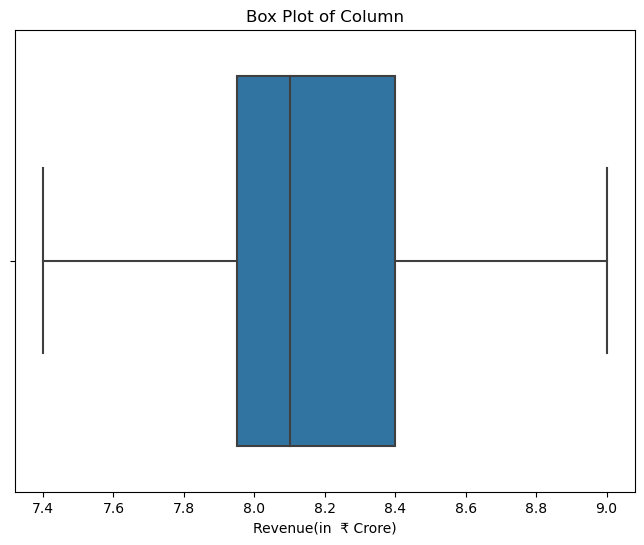

In [554]:
import matplotlib.pyplot as plt
import seaborn as sns 


plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Ratings'])

# Add labels and title
plt.xlabel('Revenue(in  ₹ Crore)')
plt.title('Box Plot of Column')

# Show the plot
plt.show()


In [553]:
Q1 = df['Ratings'].quantile(0.25)
Q3 = df['Ratings'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Ratings'] >= lower_bound) & (df['Ratings'] <= upper_bound)]

In [512]:
Q1 = df['Location'].quantile(0.25)
Q3 = df['Location'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Location'] >= lower_bound) & (df['Location'] <= upper_bound)]